## Integrace funkce jedné proměnné


V tomto cvičení si nejprve vyzkoušíme nalézt primitivní funkci k zadané funkci pomocí symbolické manipulace a následně si vyzkoušíme spočítat určitý integrál pomocí lichoběžníkového pravidla z Newton-Cotesových vzorců.

#### CACv.11.1: Neurčitý integrál

Nalezněte primitivní funkci k zadané funkci (tzn. řešte neurčitý integrál zadané funkce).
$$
F(x) = \int (-3x^2+4x+5)dx
$$

Pro výpočet neurčitého integrálu využijeme modul sympy, který není součástí standardní knihovny jazyka Python3 a je nutné ho instalovat přes balíčkovací systém pip.

Manuál: [Sympy](https://docs.sympy.org/latest/modules/integrals/integrals.html)

In [3]:
!python3 -m pip install sympy
import sympy

Python se nepovedlo naj�t. Spu


In [1]:
import sympy
x = sympy.Symbol("x")
sympy.integrate(-3*x**2 + 4*x + 5, x)

-x**3 + 2*x**2 + 5*x

#### CACv.11.2: Určitý integrál

Spočítejte následující určitý integrál na zadaném intervalu.
$$
F(x) = \int_{0}^{3} (-3x^2+4x+5)dx
$$


Výpočet provedeme pomocí lichoběžníkové integrace. Pro procvičení provedeme integraci nejprve naivním způsobem, následně ve formě Newton-Cotesovo vzorce a na závěr pomocí knihovny numpy.

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Polygon

def f(x): 
    return -3*x**2 + 4*x + 5
   
a = 0
b = 3

 #analytické řešení: I(-3x2 + 4x + 5)(a,b) = [-x3 + 2x2 + 5x](0,3) = -27 + 18 + 15 = 6

integrace lichoběžníkovým pravidlem

<img src="data/s11_trap.png" alt="Drawing" style="width: 400px;"/>

6.007499999999993


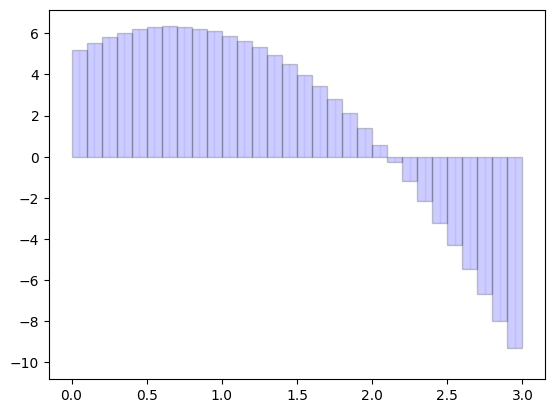

In [5]:
dx = 0.1

integral = 0
x = a
i = 0
fig, ax = plt.subplots()                        # vytvoření grafu
while x < b:
    xp = (x + x+dx) / 2
    height = f(xp)                              # výška obdélníků jako funkční hodnota středu intervalu
    #height = (f(x) + f(x + dx)) / 2            # lichoběžník

    rectangle = Rectangle((x, 0), dx, height, edgecolor='black', facecolor='blue', alpha=0.2)
    line = Rectangle((xp, 0), 0, height, edgecolor='b', facecolor='none', alpha=0.07)

    integral += dx * height
    ax.add_patch(rectangle)
    ax.add_patch(line)
    x += dx

ax.plot(x,f(x))
print(integral)
plt.show()


5.984999999999994


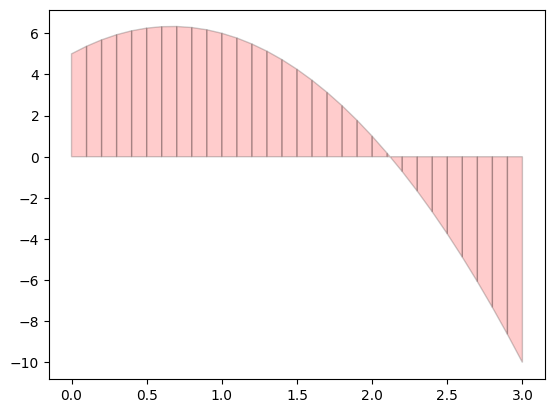

In [8]:
dx = 0.1

integral = 0
x = a
i = 0
fig, ax = plt.subplots()                        # vytvoření grafu
while x < b:
    integral += dx * (f(x) + f(x+dx))/2

    # Vykreslení dílčího lichoběžníku
    trapezoid = Polygon([(x,0), (x,f(x)), (x+dx,f(x+dx)), (x+dx,0)], 
                       closed=True, edgecolor='black', facecolor='red', alpha=0.2)
    ax.add_patch(trapezoid)
    x += dx

ax.plot(x,f(x))
print(integral)
plt.show()


integrace ve formě Newtonových-Cotesových vzorců
$$
S = h \left[\frac{f(a) + f(b)}{2}\right] + h\sum_{i=1}^{n-1} f(x_i)
$$

In [9]:
n = int((b-a)//dx)+1                # počet dělení
integral = f(a) + f(b)              # násobení h/2 až na konci
for i in range(1, n):
    integral += 2*f(a+i*dx)
integral *= dx/2
print(integral)

5.984999999999998


pomocí knihovny numpy

In [ ]:
!python3 -m pip install numpy

In [10]:
import numpy as np
x = np.arange(a, b+dx, dx)
y = f(x)
print(np.trapz(y, dx=dx))               # trapezoid - lichoběžník

5.984999999999999


pomocí knihovny scipy

In [ ]:
!python3 -m pip install scipy

In [ ]:
# pro apple silicon architektury
!python3 -m pip install --pre -i https://pypi.anaconda.org/scipy-wheels-nightly/simple scipy

In [11]:
from scipy import integrate

In [15]:
# trapezoid
print(integrate.trapezoid(y, x=x))          # první argument vždy funkce ve formě pole, druhý pole x
print(integrate.trapezoid(y, dx=dx))        # druhý argument šířka vzorkování

5.985
5.984999999999999


In [16]:
# simpson
x = np.arange(a, b+dx, dx)
y = f(x)
print(integrate.simpson(y=y, x=x))          # argumenty stejné jako trapezoid
print(integrate.simpson(y=y, dx=dx))

6.000000000000002
5.999999999999996


In [19]:
# romberg
print(integrate.romberg(f, a, b))           # funkce, ne pole

6.0


In [81]:
# gaussian
print(integrate.quadrature(f, a, b))

(5.9999999999999964, 1.1546319456101628e-14)


### Samostatná cvičení

#### SCv.11.1: Symbolická matematika

Pomocí symbolické matematiky vypočítejte následující integrály. Zkuste předem odhadnout podmínky integrace a existence primitivní funkce.
$$
F(x) = \int_{-\infty}^{\infty} e^{-ax^2} {\rm d}x
$$

In [12]:
import sympy
import numpy as np
import matplotlib.pyplot as plt

Piecewise((sqrt(pi)*erf(sqrt(a)*x)/(2*sqrt(a)), Ne(a, 0)), (x, True))

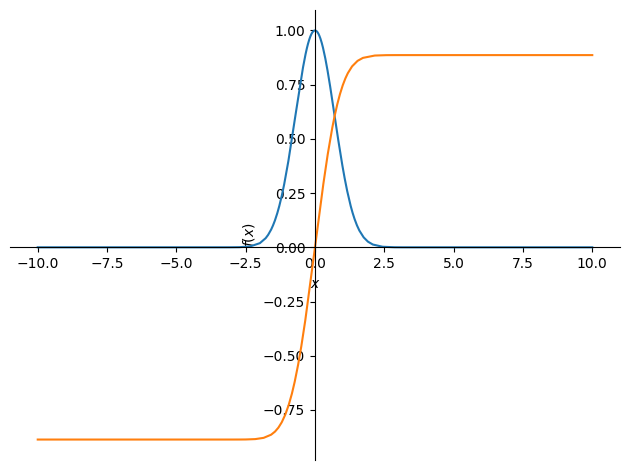

In [15]:
x = sympy.Symbol("x")
a = sympy.Symbol("a")
f = sympy.exp(-a*x**2)
#sympy.Integral(f, x).doit()        # pouze výpis, výpočet přes doit()
F = sympy.integrate(f, x)
display(F)
#sympy.integrate(f, (x, -np.inf, np.inf))

#f_np = sympy.lambdify(x, f.subs(a, 1), 'numpy')  # Vytvoření funkce pro vyhodnocení výrazu
a0 = 1
sympy.plot(f.subs(a, a0), F.subs(a, a0))

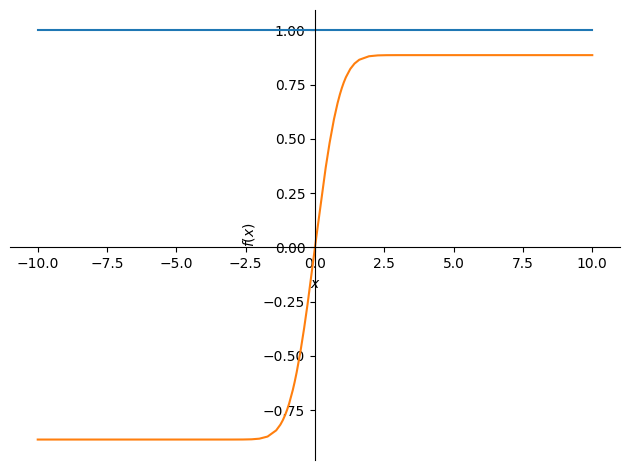

In [16]:
# pro a = 0 je výsledek jiný

# Definice symbolických proměnných
x = sympy.Symbol("x")
a = sympy.Symbol("a")
F = sympy.sqrt(sympy.pi)/2*sympy.erf(x)

a0 = 0
sympy.plot(f.subs(a, a0), F.subs(a, a0))

$$
F(x) = \int x^a {\rm d}x
$$

Piecewise((x**(a + 1)/(a + 1), Ne(a, -1)), (log(x), True))

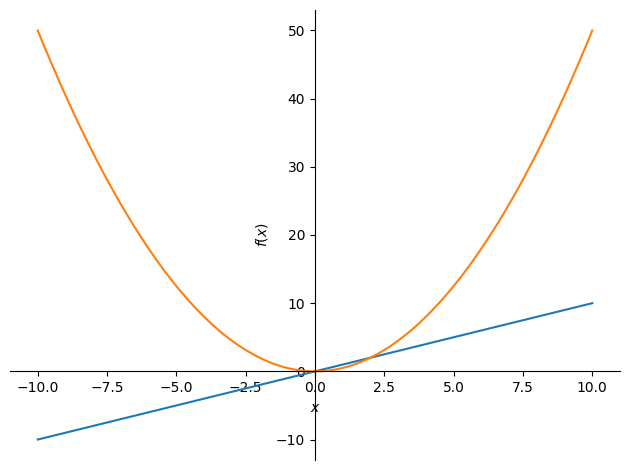

In [20]:
x = sympy.Symbol("x")
a = sympy.Symbol("a")
f = x**a
F = sympy.integrate(f, x)
display(F)

a0 = 1
sympy.plot(f.subs(a, a0), F.subs(a, a0))

$$
F(x) = \int \arccos(\sin x) {\rm d}x
$$

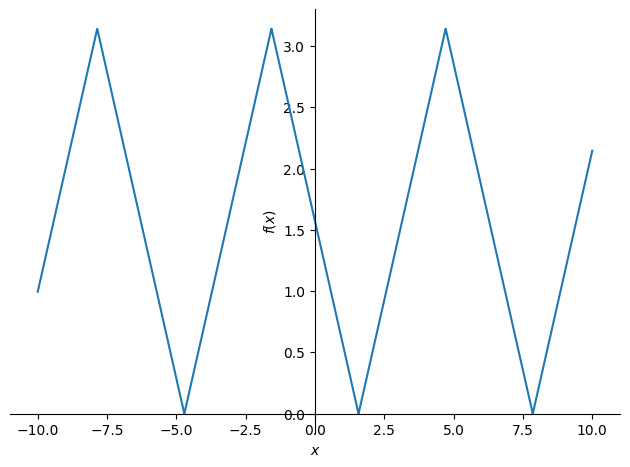

In [21]:
x = sympy.Symbol("x")
f = sympy.acos(sympy.sin(x))
sympy.plot(f)

In [97]:
# selhání analytické metody (výpočet trvá kolem minuty)
x = sympy.Symbol("x")
f = sympy.acos(sympy.sin(x))
F = sympy.integrate(f, x)
display(F)

Integral(acos(sin(x)), x)

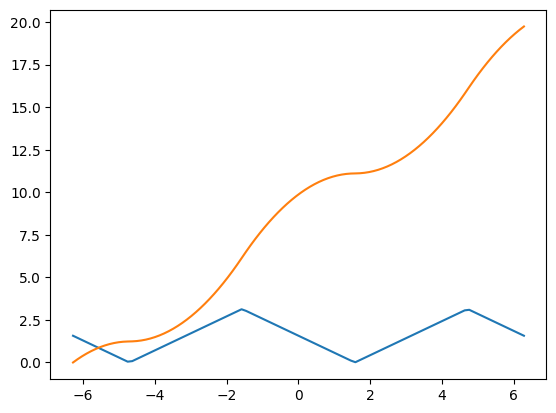

In [22]:
# vykreslení primitivní fce pomocí numerické metody
from scipy import integrate

def f(x):                                                   # definice funkce arccos(sin(x))
    return np.arccos(np.sin(x))

xs = np.linspace(-2*np.pi, 2*np.pi, 100)                    # testovací hodnoty x

#F_values = integrate.cumtrapz(f(xs), xs, initial=0)         # zastaralá metoda
Fs = integrate.cumulative_trapezoid(f(xs), xs, initial=0)   # vypočet primitivní funkce numericky

plt.plot(xs, f(xs))                                         # vykreslení f
plt.plot(xs, Fs)                                            # vykreslení F
plt.show()


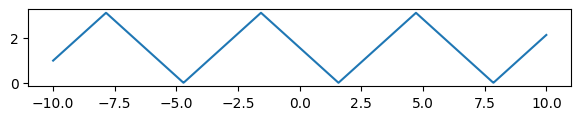

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):                               # definice funkce arccos(sin(x))
    x_mod = (x - np.pi/2) % (2 * np.pi)     # periodické rozšíření na celý definiční obor
    if 0 <= x_mod <= np.pi:
        return x_mod
    else:
        return 2*np.pi - x_mod

xs = np.linspace(-10, 10, 1000)
ys = np.array([f(x) for x in xs])

# Vykreslení grafu
plt.figure(figsize=(7, 1))
plt.plot(xs, ys)
plt.show()


$$
F(x) = \int \ln(\sin x) {\rm d}x
$$

Integral(log(sin(x)), x)


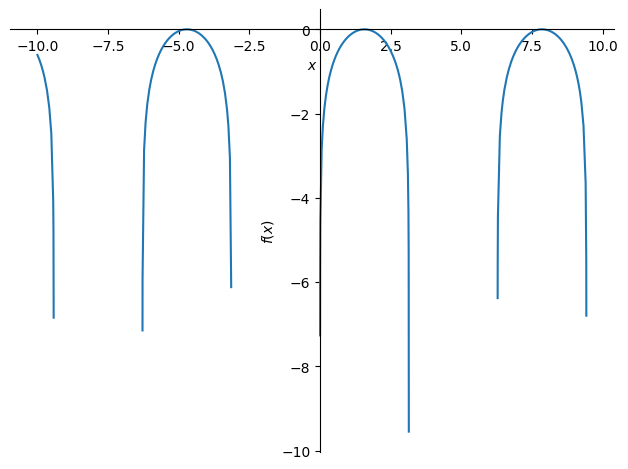

In [25]:
x = sympy.Symbol("x")
f = sympy.log(sympy.sin(x))
print(sympy.integrate(f, x))
sympy.plot(f)

C:\Users\P\AppData\Local\Temp\ipykernel_13980\3411061659.py:5: RuntimeWarning: invalid value encountered in log
  return np.log(np.sin(x))


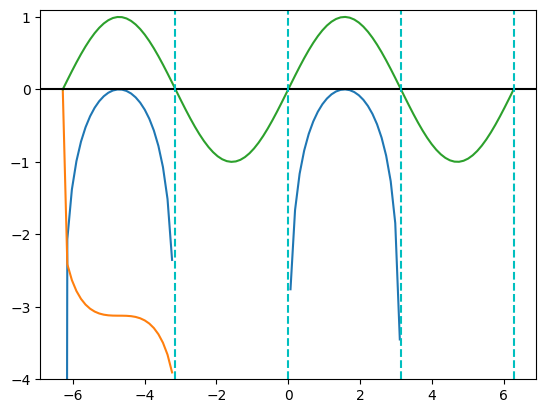

In [115]:
# vykreslení primitivní fce pomocí numerické metody
from scipy import integrate

def f(x):                                                   # definice funkce arccos(sin(x))
    return np.log(np.sin(x))

xs = np.linspace(-2*np.pi, 2*np.pi, 100)                    # testovací hodnoty x

#F_values = integrate.cumtrapz(f(xs), xs, initial=0)         # zastaralá metoda
Fs = integrate.cumulative_trapezoid(f(xs), xs, initial=0)   # vypočet primitivní funkce numericky

plt.plot(xs, f(xs))                                         # vykreslení f
plt.plot(xs, Fs)                                            # vykreslení F
plt.plot(xs, np.sin(xs))
plt.axhline(y=0, color='k')
for i in range(-1, 3):                                       # 5 přímek v intervalu [0, 2*np.pi]
    plt.axvline(i*np.pi, color='c', linestyle='--')         # perioda pi

plt.ylim(-4,1.1)
plt.show()


#### SCv.11.2: Určitý integrál

Pomocí built-in funkcí nebo metod numerické matematiky vypočítejte následující určité integrály. Použijte alespoň tři různé integrační metody a porovnejte je mezi sebou z hlediska přesnosti výpočtu.
$$
\int_{0}^{2\pi} \sin(x) {\rm d}x
$$

In [24]:
import numpy as np

def f(x):
    return np.sin(x)

a = 0
b = 2*np.pi
dx = 0.1

x = np.arange(a, b+dx, dx)
y = f(x)

print("trapezoid: ", integrate.trapezoid(y, x=x))
print("simpson: ", integrate.simpson(y=y, x=x))
print("romberg: ", integrate.romberg(f, a, b))

trapezoid:  0.00014124579393251947
simpson:  0.00014066340514081377
romberg:  2.5648942582957195e-16


$$
\int_{0}^{1} \left[ x^2 - 2x + 6 \right] {\rm d}x
$$

In [25]:
import numpy as np

def f(x):
    return x**2 - 2*x + 6

a = 0
b = 1
dx = 0.1

x = np.arange(a, b+dx, dx)
y = f(x)

print("trapezoid: ", integrate.trapezoid(y, x=x))
print("simpson: ", integrate.simpson(y=y, x=x))
print("romberg: ", integrate.romberg(f, a, b))

trapezoid:  5.335
simpson:  5.333333333333332
romberg:  5.333333333333333


$$
\int_0^{\pi/4} e^{3x}\sin(2x) {\rm d}x
$$

In [26]:
import numpy as np

def f(x):
    return np.exp(3*x)*np.sin(2*x)

a = 0
b = np.pi/4.
dx = 0.1

x = np.arange(a, b+dx, dx)
y = f(x)

print("trapezoid: ", integrate.trapezoid(y, x=x))
print("simpson: ", integrate.simpson(y=y, x=x))
print("romberg: ", integrate.romberg(f, a, b))

trapezoid:  2.771455172001907
simpson:  2.7460056600827754
romberg:  2.5886286325075183


### Domácí cvičení

#### DCv.11.1: Newtonovy-Cotesovy vzorce
Naprogramujte si zbylé Newtonovy-Cotesovy vzorce (Simpsonovo pravidlo, Simpsonovo 3/8 pravidlo, Booleovo pravidlo) svépomocí a porovnejte jejich přesnost s lichoběžníkovým pravidlem. 

<img src="data/s11_nc.png" alt="Drawing" style="width: 600px;"/>

Kolik subintervalů potřebují jednotlivé metody, aby dosáhly dostatečné přenosti?

#### DCv.11.2: Interpolace a integrace

Následující tabulka obsahuje souřadnice hranice pozemku v metrech. Pomocí lichoběžníkové integrace zjistěte rozlohu pozemku v metrech čtverečních. Data také naleznete v souboru pozemek.txt.

<table>
    <thead style="background-color:#444444;">
        <td>x</td><td>y</td>
    </thead>
    <tr>
        <td>0</td><td>125</td>
    </tr>
    <tr>
        <td>100</td><td>125</td>
    </tr>
    <tr>
        <td>200</td><td>120</td>
    </tr>
    <tr>
        <td>300</td><td>112</td>
    </tr>
    <tr>
        <td>400</td><td>90</td>
    </tr>
    <tr>
        <td>500</td><td>90</td>
    </tr>
    <tr>
        <td>600</td><td>95</td>
    </tr>
    <tr>
        <td>700</td><td>88</td>
    </tr>
    <tr>
        <td>800</td><td>75</td>
    </tr>
    <tr>
        <td>900</td><td>35</td>
    </tr>
    <tr>
        <td>1000</td><td>0</td>
    </tr>

</table>

#### DCv.11.3: Rombergova integrace

Jeden ze způsobů jak zvětšit přenost intergrace je Richardsonova extrapolace (RE). Cílem RE je zlepšit integrační přenost eliminací chyb. Rombergova integrace (také známo jako Rombergova kvadratura) je metoda, která zlepšuje výsledek lichoběžníkové integrace odstraněním chyb Richardsonovou extrapolací. Pochopení metody vyžaduje mentální uchopení konceptu rekurze. Pročtěte si následující zdroje a projděte si kód s implementovanou Rombergovou integrací, který jsme pro vás připravili.

Zdroje k samostudiu: [CZ](http://physics.ujep.cz/~mlisal/nm_1/jskvor/PDF/IntegralRomberg.pdf) [EN](https://towardsdatascience.com/numerical-integration-romberg-integration-3f54002ab538)


$$𝑆(𝑛,𝑚)=𝑆(𝑛,𝑚−1)+(𝑆(𝑛,𝑚−1)−𝑆(𝑛−1,𝑚−1))/(4^𝑚−1)$$


In [31]:
def romberg(a, b, i, j):
    if j == 0:
        n = 2**i
        dx = (b-a)/n
        return np.trapz(f(np.linspace(a, b, n)), dx=dx)
    if 0 < j <= i:
        return romberg(a, b, i, j-1) + (romberg(a, b, i, j-1) - romberg(a, b, i-1, j-1))/(4**j - 1)

print(romberg(a, b, i=10, j=5))

2.5870882254694396


#### Výpočet určitého integrálu metodou Monte Carlo

Jelikož Metodou Monte Carlo lze spočítat obsah nebo objem nějaké oblasti, lze s ní spočítat i určitý integrál. Opakování předchozí metody tedy vede k myšlence:
1. vygeneruj náhodné souřadnice x a fx
2. zjisti, zda spadají do oblasti, kterou funkce vytyčuje svou funkční hodnotou nad/pod osou x
3. započti nebo nezapočti zásah
4. spočítej integrál jako obsah oblasti pomocí procenta zásahů a obsahu omezující oblasti

Omezující oblast spočítáme jako obdélník, který je šiřoký jako definiční obor a vysoký jako obor hodnot. Zde se počítá s tím, že celý definiční obor je spojitý a stejně tak obor hodnot. Tento přístup (tzv. rejection sampling metoda) bude však značně nepřesný a také počítá integrál v absolutní hodnotě.

In [26]:
import random
import numpy as np
import matplotlib.pyplot as plt

5.408


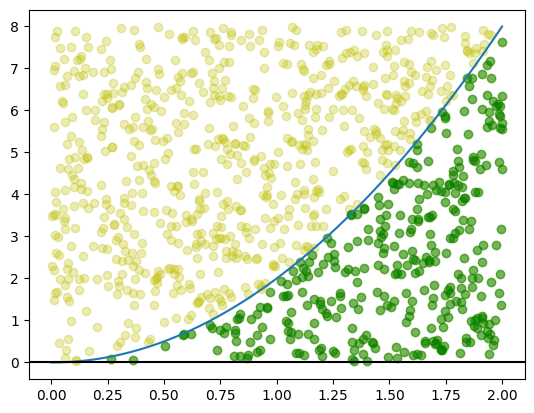

In [28]:
def zobraz(a, b, f, xs, fxs):
    x = np.linspace(a, b, 100)
    plt.plot(x, f(x))
    plt.axhline(y=0, color='k')

    condition = fxs < f(xs)
    xf = xs[condition]
    yf = fxs[condition]
    plt.scatter(xs, fxs, color='y', alpha=0.3)
    plt.scatter(xf, yf, color='g', alpha=0.5)

def integral(a, b, f, pocet_vzorku):
    max_f = max(f(np.linspace(a, b, 100000)))               # horní závora
    xs = np.random.uniform(a, b, pocet_vzorku)              # náhodné hodnoty x (mezi a a b)
    fxs = np.random.uniform(0, max_f, pocet_vzorku)         # náhodné funkční hodnoty (pro porovnání)
    hits = sum([1 for x, fx in zip(xs, fxs) if fx <= f(x)]) # spočítá hodnoty pod křivkou
    zobraz(a, b, f, xs, fxs)
    return (b-a)*max_f*hits/pocet_vzorku                    # obsah obdélníku

f=lambda x: 2*x**2
print(integral(a=0, b=2, f=f, pocet_vzorku=1000))
plt.show()

4.0104
0.639
0.6494399999999999


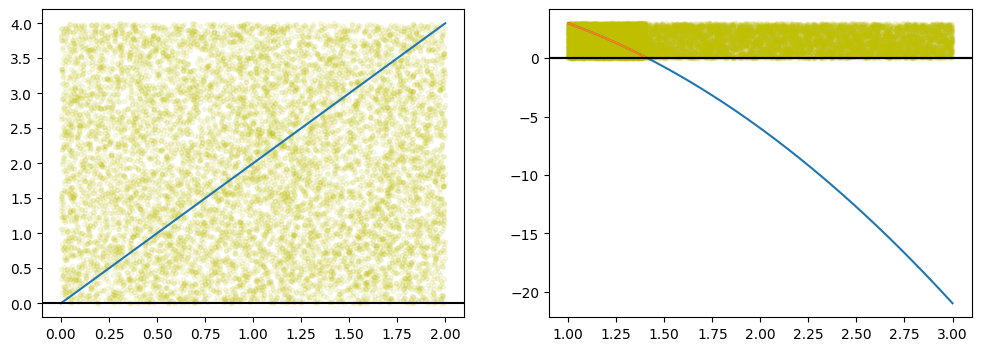

In [29]:
# původní
i = 0                                                       # počitadlo grafů
fig, axs = plt.subplots(1, 2, figsize=(12, 4))              # 12" šířka, 4" výška
def zobraz(a, b, f, xs, fxs):
    x = np.linspace(a, b, 100)
    axs.flat[i].plot(x, f(x))
    axs.flat[i].axhline(y=0, color='k')
    axs.flat[i].scatter(xs, fxs, marker=".", color='y', alpha=0.1)

def integral(a, b, f, pocet_vzorku):
    max_f = max(f(np.linspace(a, b, 100000)))               # horní závora
    xs = np.random.uniform(a, b, pocet_vzorku)              # náhodné hodnoty x (mezi a a b)
    fxs = np.random.uniform(0, max_f, pocet_vzorku)         # náhodné funkční hodnoty (pro porovnání)
    hits = sum([1 for x, fx in zip(xs, fxs) if fx <= f(x)]) # spočítá hodnoty pod křivkou
    zobraz(a, b, f, xs, fxs)
    return (b-a)*max_f*hits/pocet_vzorku                    # obsah obdélníku

# int_0^2(2*x) = 0^2[x**2] = 4 - 0 = 4
print(integral(a=0, b=2, f=lambda x: 2*x, pocet_vzorku=10000))
i += 1

# int_1^3(-3x**2+6) = 1^3[-x**3+6x] = [-3**3 + 6*3] - [-1**3 + 6*1] =  [-27 + 18] - [-1 + 6] = -9 -5 = -14
print(integral(a=1, b=3, f=lambda x: -3*x**2 + 6, pocet_vzorku=10000))
print(integral(a=1, b=1.4, f=lambda x: -3*x**2 + 6, pocet_vzorku=10000))
# pod osou y se příspěvky neprojeví

plt.show()

3.9928
0.3329
0.6755999999324387
15.2736


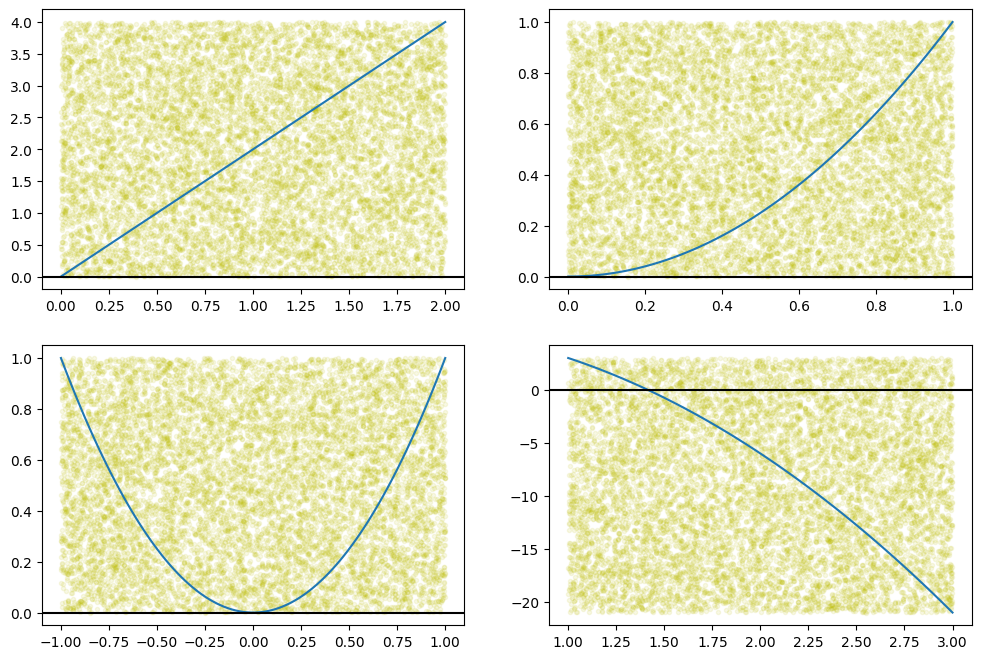

In [4]:
i = 0                                                       # počitadlo grafů
fig, axs = plt.subplots(2, 2, figsize=(12, 8))              # 12" šířka, 8" výška
def zobraz(a, b, f, xs, fxs):
    x = np.linspace(a, b, 100)
    axs.flat[i].plot(x, f(x))
    axs.flat[i].axhline(y=0, color='k')
    axs.flat[i].scatter(xs, fxs, marker=".", color='y', alpha=0.1)

def integral(a, b, f, pocet_vzorku):
    max_f = max(f(np.linspace(a, b, 100000)))               # horní závora
    min_f = min(f(np.linspace(a, b, 100000)))               # dolní závora
    xs = np.random.uniform(a, b, pocet_vzorku)              # náhodné hodnoty x (mezi a a b)
    fxs = np.random.uniform(min_f, max_f, pocet_vzorku)     # náhodné funkční hodnoty (pro porovnání)
    fx_in_domain = [fx for x, fx in zip(xs, fxs) if fx <= f(x) and fx>0 or fx >= f(x) and fx<0]
    hits = len(fx_in_domain)
    zobraz(a, b, f, xs, fxs)
    return (b-a)*(max_f-min_f)*hits/pocet_vzorku

#int_0^2(2*x) = 0^2[x**2] = 4 - 0 = 4
print(integral(a=0, b=2, f=lambda x: 2*x, pocet_vzorku=10000))
i += 1

#int_0^1(x**2) = 0^1[1/3 * x**3] = [1/3 1**3] - [1/3 * 0**3] = 1/3
print(integral(a=0, b=1, f=lambda x: x**2, pocet_vzorku=10000))
i += 1

#int_-1^1(x**2) = -1^1[1/3 * x**3] = [1/3 1**3] - [1/3 *(-1)**3] = 2/3
print(integral(a=-1, b=1, f=lambda x: x**2, pocet_vzorku=10000))
i += 1

#int_1^3(-3x**2+6) = 1^3[-x**3+6x] = [-3**3 + 6*3] - [-1**3 + 6*1] =  [-27 + 18] - [-1 + 6] = -9 -5 = -14
print(integral(a=1, b=3, f=lambda x: -3*x**2 + 6, pocet_vzorku=10000))

plt.show()

#### Cvičení 3: Integrál

Lepší řešení je náhodně vzorkovat prostor $(x,fx)$ a spočítat průměrnou navzorkovanou funkční hodnotu. Integrál se pak spočítá jako plocha oblasti od A do B na ose x a 0 do stredni hodnoty z navzorkovaných hodnot na ose y.
$$
\overline{I}_n \equiv \frac{1}{n} \sum_{i=1}^{n}I_i = \frac{b-a}{n} \sum_{i=1}^{n}g(a+(b-a)U_i)
$$
<!--img src="MS8_soubory/integral.png" alt="Drawing" style="width: 600px;"/-->

Vaším úkolem je naprogramovat výpočet integrálu touto metodou.

6.146924929990662


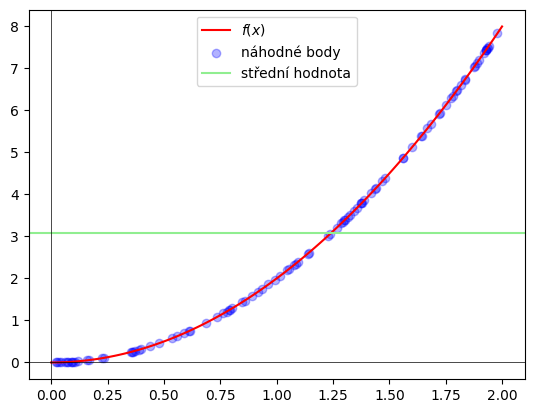

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def integral(a, b, f, n):
    xs = np.random.uniform(a, b, n)
    return (b-a)*np.mean(f(xs)), xs

f=lambda x: 2*x**2

integral_value, generated_xs = integral(a=0, b=2, f=f, n=100)
print(integral_value)

# Vytvoření grafu s vygenerovanými body
plt.plot(np.linspace(0, 2, 100), f(np.linspace(0, 2, 100)), color='red', label='$f(x)$')
plt.scatter(generated_xs, f(generated_xs), color='blue', alpha=0.3, label='náhodné body')
plt.axhline(integral_value/(2-0), color = "lightgreen", label="střední hodnota")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()


In [ ]:
def integral(a, b, f, n):
    xs = np.random.uniform(a, b, n)
    return (b-a)*np.mean(f(xs))

#int_0^2(2*x) = 0^2[x**2] = 4 - 0 = 4
print(integral(a=0, b=2, f=lambda x: 2*x, n=10000))

#int_0^1(x**2) = 0^1[1/3 * x**3] = [1/3 1**3] - [1/3 * 0**3] = 1/3
print(integral(a=0, b=1, f=lambda x: x**2, n=10000))

#int_-1^1(x**2) = -1^1[1/3 * x**3] = [1/3 1**3] - [1/3 *(-1)**3] = 2/3
print(integral(a=-1, b=1, f=lambda x: x**2, n=10000))

#int_1^3(-3x**2+6) = 1^3[-x**3+6x] = [-3**3 + 6*3] - [-1**3 + 6*1] =  [-27 + 18] - [-1 + 6] = -9 -5 = -14
print(integral(a=1, b=3, f=lambda x: -3*x**2 + 6, n=10000))

4.00720589764762
0.3346285054764385
0.6685343062609723
-14.157649488481326
